In [ ]:
pip install dash

In [ ]:
#Kütüphaneleri import edelim

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objs as go

<ipython-input-2-21ef7e98a8b8>:7: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-2-21ef7e98a8b8>:8: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


VERİYE İLK BAKIŞ

In [ ]:
#Veri setini yükleme
df = pd.read_csv("2024_Paris_olympics_Medallists.csv")

In [ ]:
#Veri setinin boyu (Kaça kaçlık matris?)
df.shape

(91, 7)

In [ ]:
#Değişkenlerde eksiklik durumu var mı? (Yok)
df.isnull().sum()

,0
Rank,0
Country,0
Country Code,0
Gold,0
Silver,0
Bronze,0
Total,0


In [ ]:
#İlk beş veriye bakış
df.head()

,Rank,Country,Country Code,Gold,Silver,Bronze,Total
0,1,United States,US,40,44,42,126
1,2,China,CHN,40,27,24,91
2,3,Japan,JPN,20,12,13,45
3,4,Australia,AUS,18,19,16,53
4,5,France,FRA,16,26,22,64


In [ ]:
#Son beş veriye bakış
df.tail()

,Rank,Country,Country Code,Gold,Silver,Bronze,Total
86,84,Peru,PER,0,0,1,1
87,84,Qatar,QAT,0,0,1,1
88,84,Singapore,SIN,0,0,1,1
89,84,Slovakia,SVK,0,0,1,1
90,84,Zambia,ZAM,0,0,1,1


In [ ]:
df[['Total', 'Country']].drop_duplicates().reset_index(drop=True)

,Total,Country
0,126,United States
1,91,China
2,45,Japan
3,53,Australia
4,64,France
...,...,...
86,1,Peru
87,1,Qatar
88,1,Singapore
89,1,Slovakia


In [ ]:
#Değişken isimlerine bakalım (Sütun isimleri)
df.columns

Index(['Rank', 'Country', 'Country Code', 'Gold', 'Silver', 'Bronze', 'Total'], dtype='object')

In [ ]:
#Veri tipleri (Numerik - kategorik değişken)
df.dtypes

,0
Rank,int64
Country,object
Country Code,object
Gold,int64
Silver,int64
Bronze,int64
Total,int64


In [ ]:
#Detaylı bilgi için (Sütunların hangi veri tipinden olduğuna bakalım)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          91 non-null     int64 
 1   Country       91 non-null     object
 2   Country Code  91 non-null     object
 3   Gold          91 non-null     int64 
 4   Silver        91 non-null     int64 
 5   Bronze        91 non-null     int64 
 6   Total         91 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 5.1+ KB


In [ ]:
#Sütunların istatistiksel özeti
df.describe()

,Rank,Gold,Silver,Bronze,Total
count,91.000000,91.000000,91.000000,91.000000,91.000000
mean,45.307692,3.604396,3.593407,4.219780,11.417582
std,25.652244,6.990278,6.770816,6.558798,19.702829
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,23.500000,0.000000,0.000000,1.000000,2.000000
50%,44.000000,1.000000,1.000000,2.000000,5.000000
75%,68.000000,3.000000,3.000000,5.000000,9.000000
max,84.000000,40.000000,44.000000,42.000000,126.000000


In [ ]:
#Kategorik değişkenlere bakalım (Sayısal olmayan veriler)

categoric_cols = df.select_dtypes(include=['object']).columns
list(categoric_cols)

['Country', 'Country Code']

VERİ GÖRSELLEŞTİRME

1) Bar Grafiği

Kategorik değişken için.

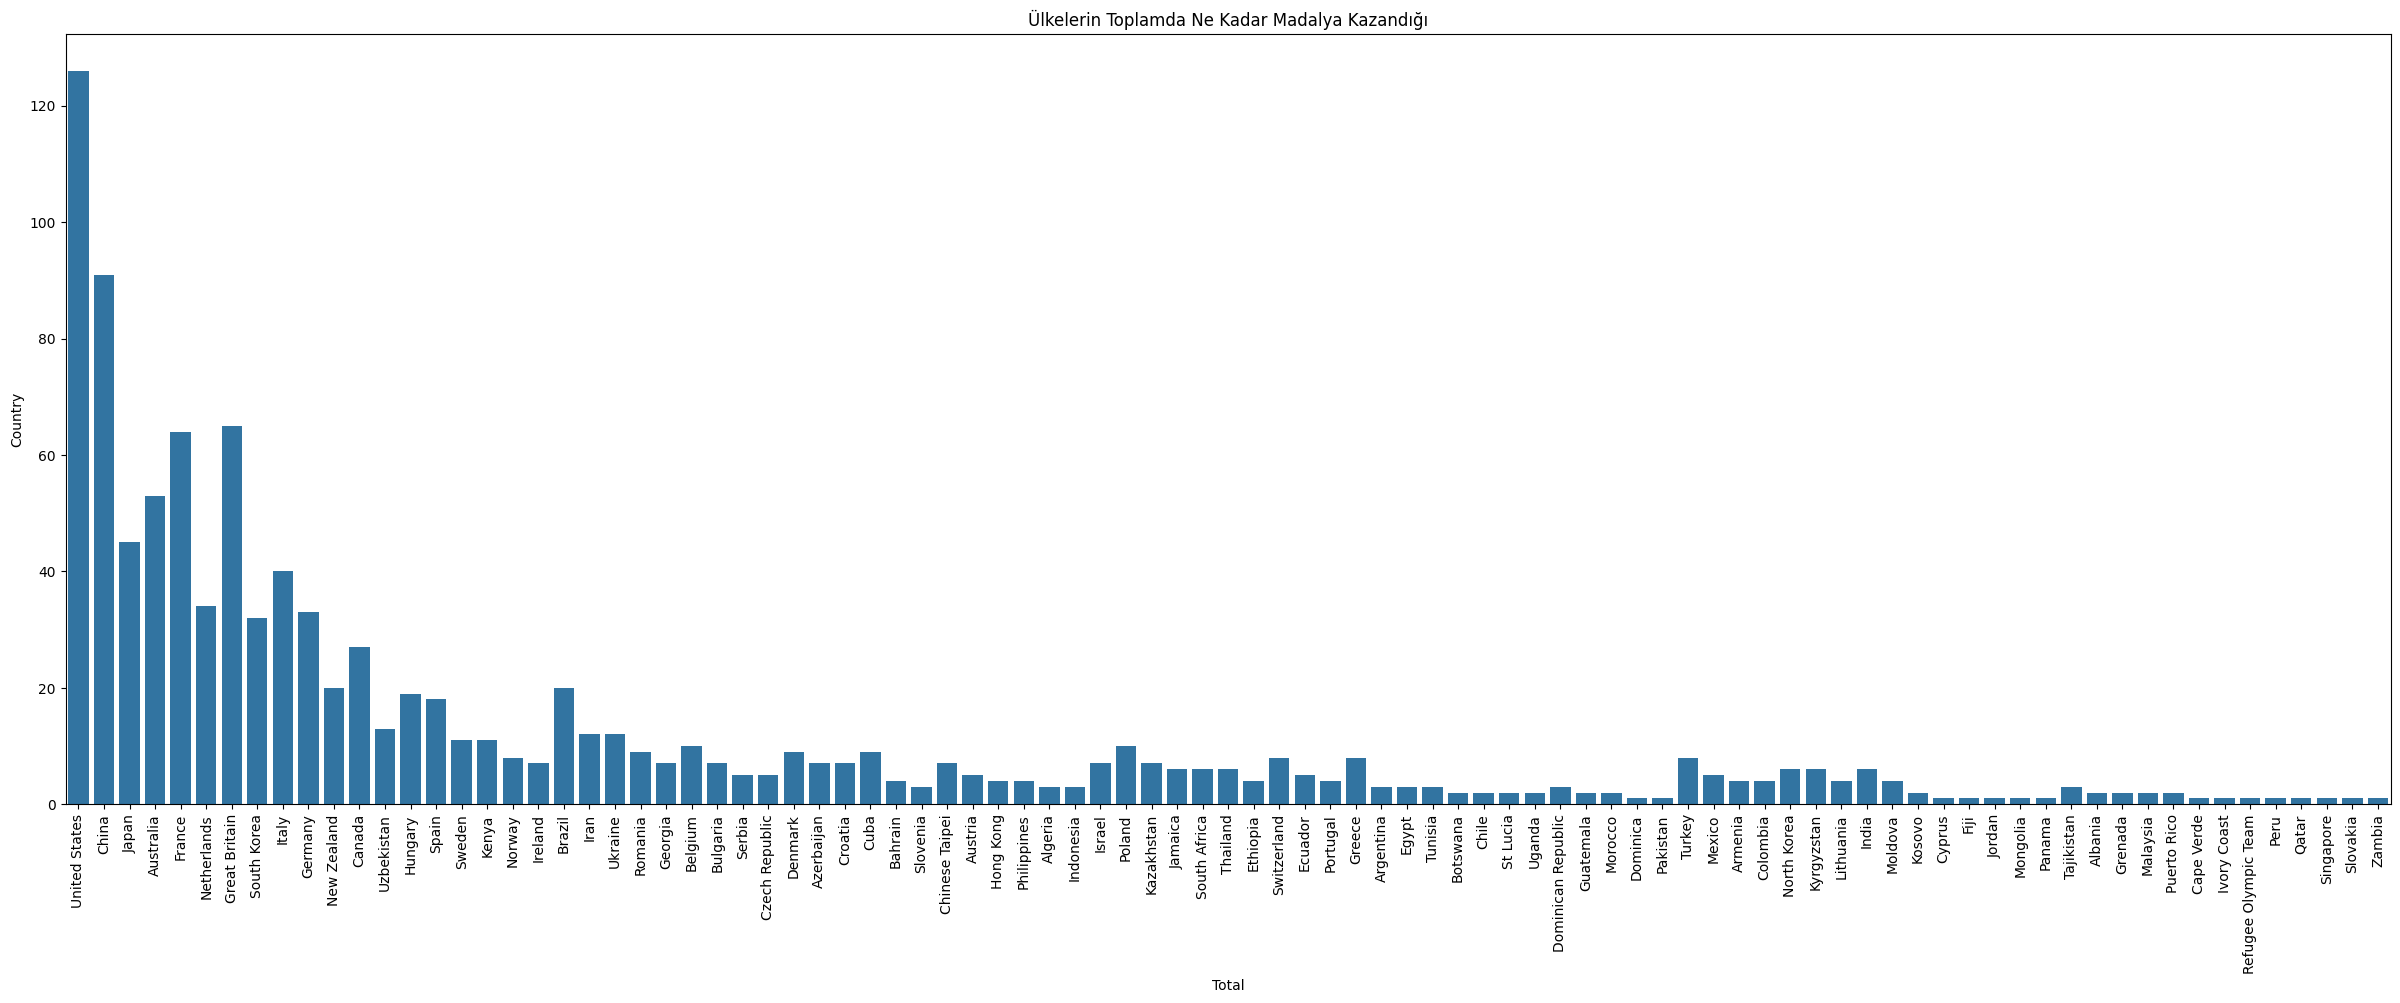

In [ ]:
#Hangi ülke toplamda ne kadar madalya kazandı?

plt.figure(figsize=(30, 10))
sns.barplot(x="Country", y="Total", data=df)
plt.xticks(rotation=90)
plt.title("Ülkelerin Toplamda Ne Kadar Madalya Kazandığı")
plt.xlabel("Total")
plt.ylabel("Country")
plt.show()

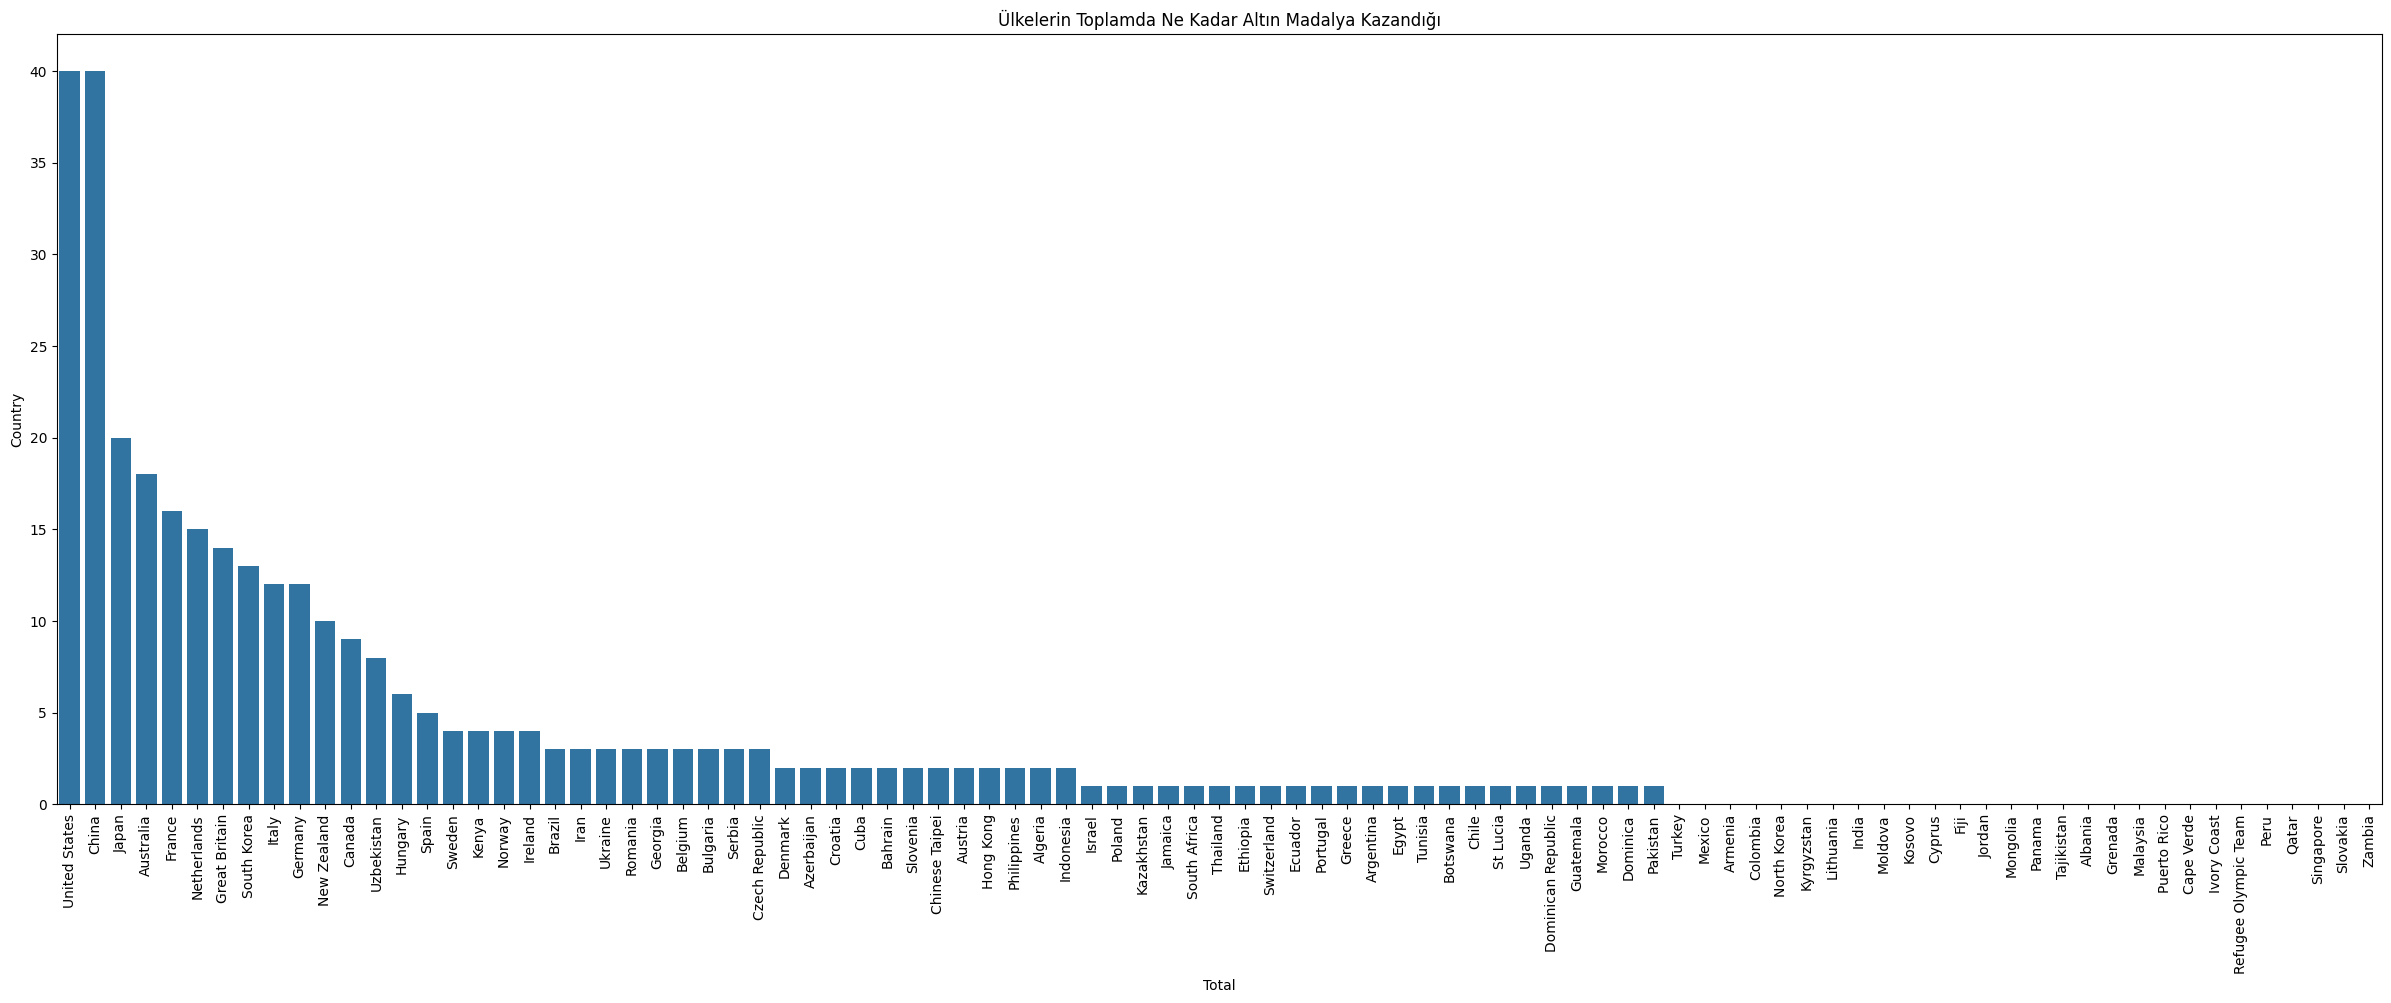

In [ ]:
#Hangi ülke toplamda ne kadar altın madalya kazandı?

plt.figure(figsize=(30, 10))
sns.barplot(x="Country", y="Gold", data=df)
plt.xticks(rotation=90)
plt.title("Ülkelerin Toplamda Ne Kadar Altın Madalya Kazandığı")
plt.xlabel("Total")
plt.ylabel("Country")
plt.show()

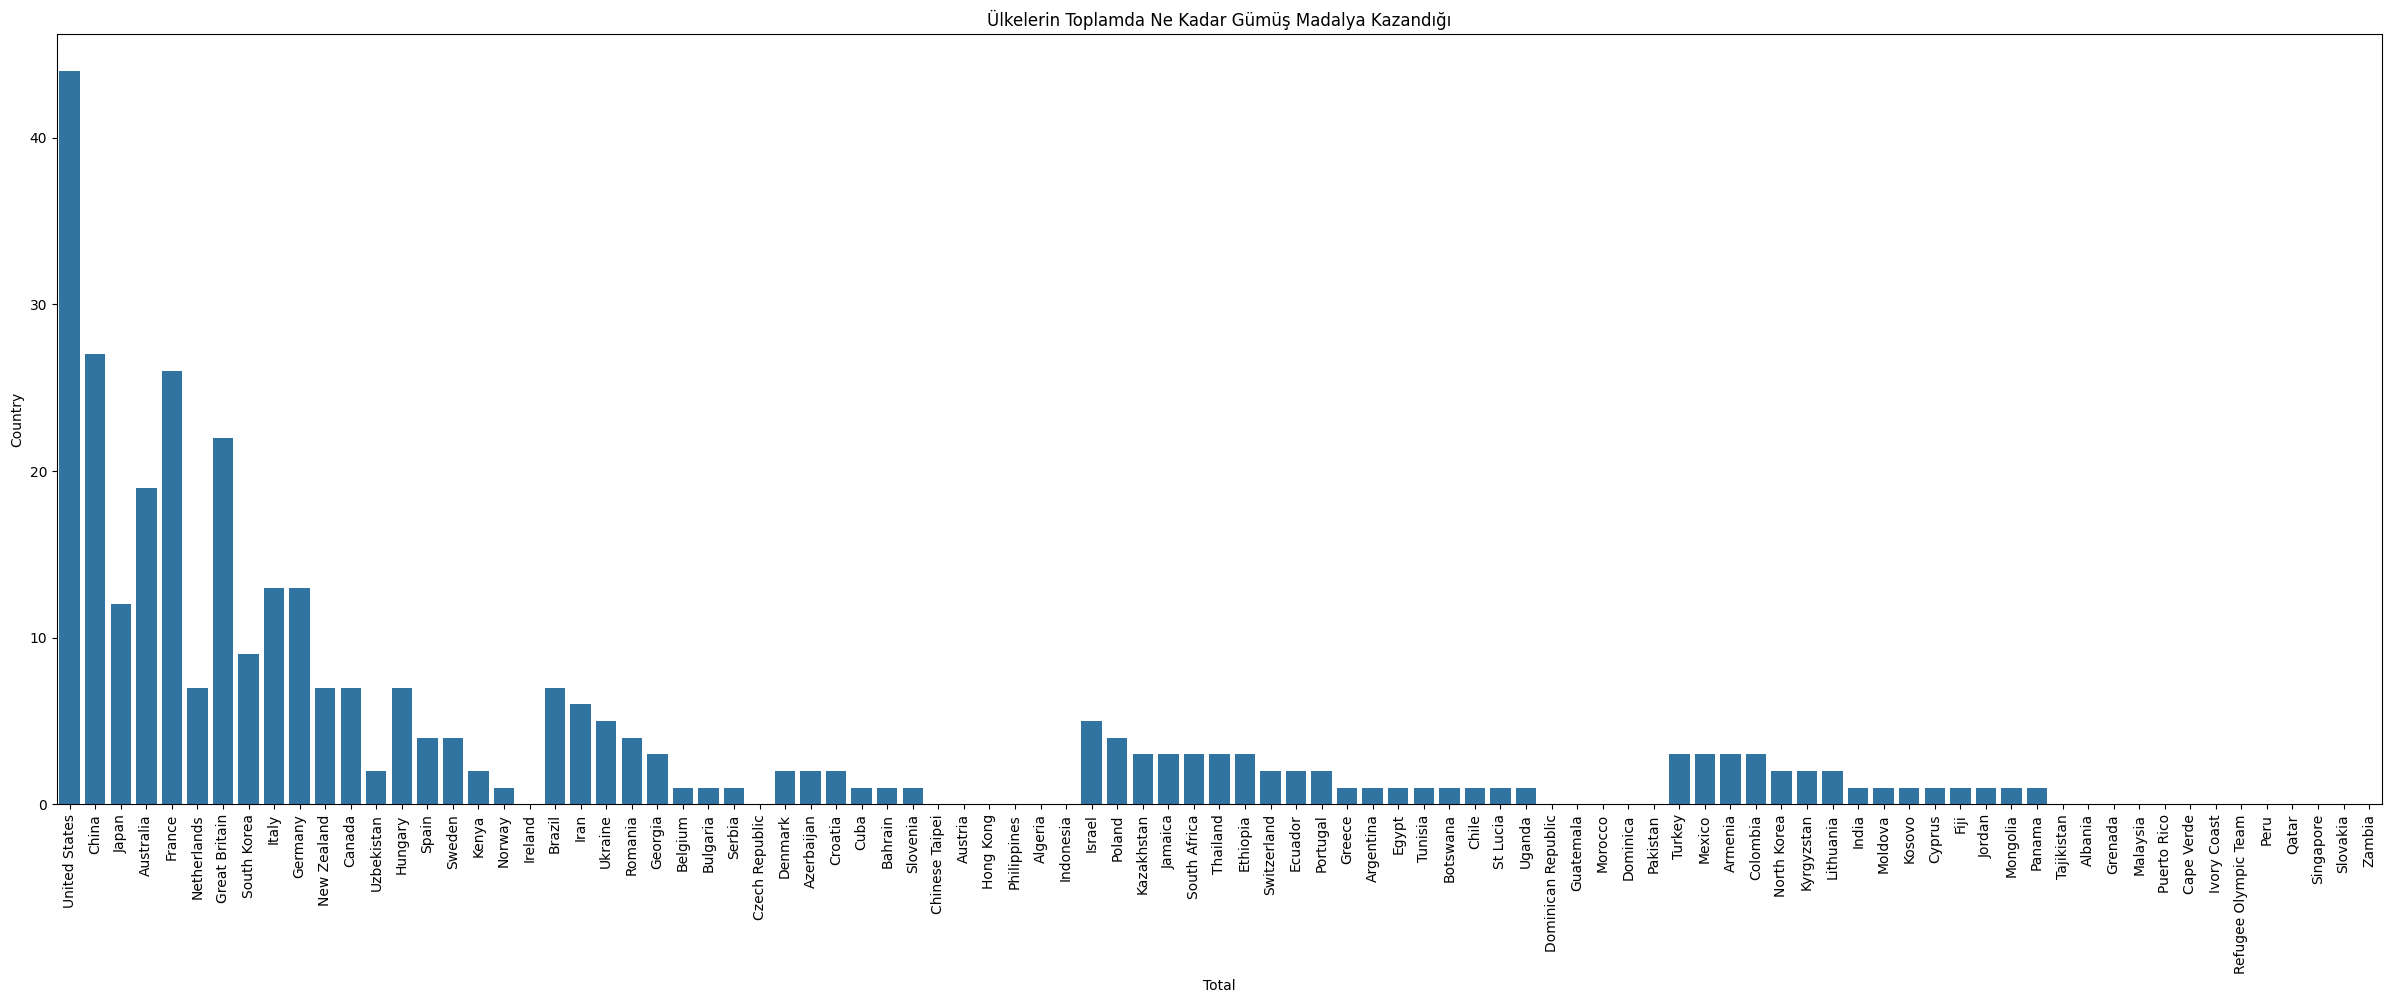

In [ ]:
#Hangi ülke toplamda ne kadar gümüş madalya kazandı?

plt.figure(figsize=(30, 10))
sns.barplot(x="Country", y="Silver", data=df)
plt.xticks(rotation=90)
plt.title("Ülkelerin Toplamda Ne Kadar Gümüş Madalya Kazandığı")
plt.xlabel("Total")
plt.ylabel("Country")
plt.show()

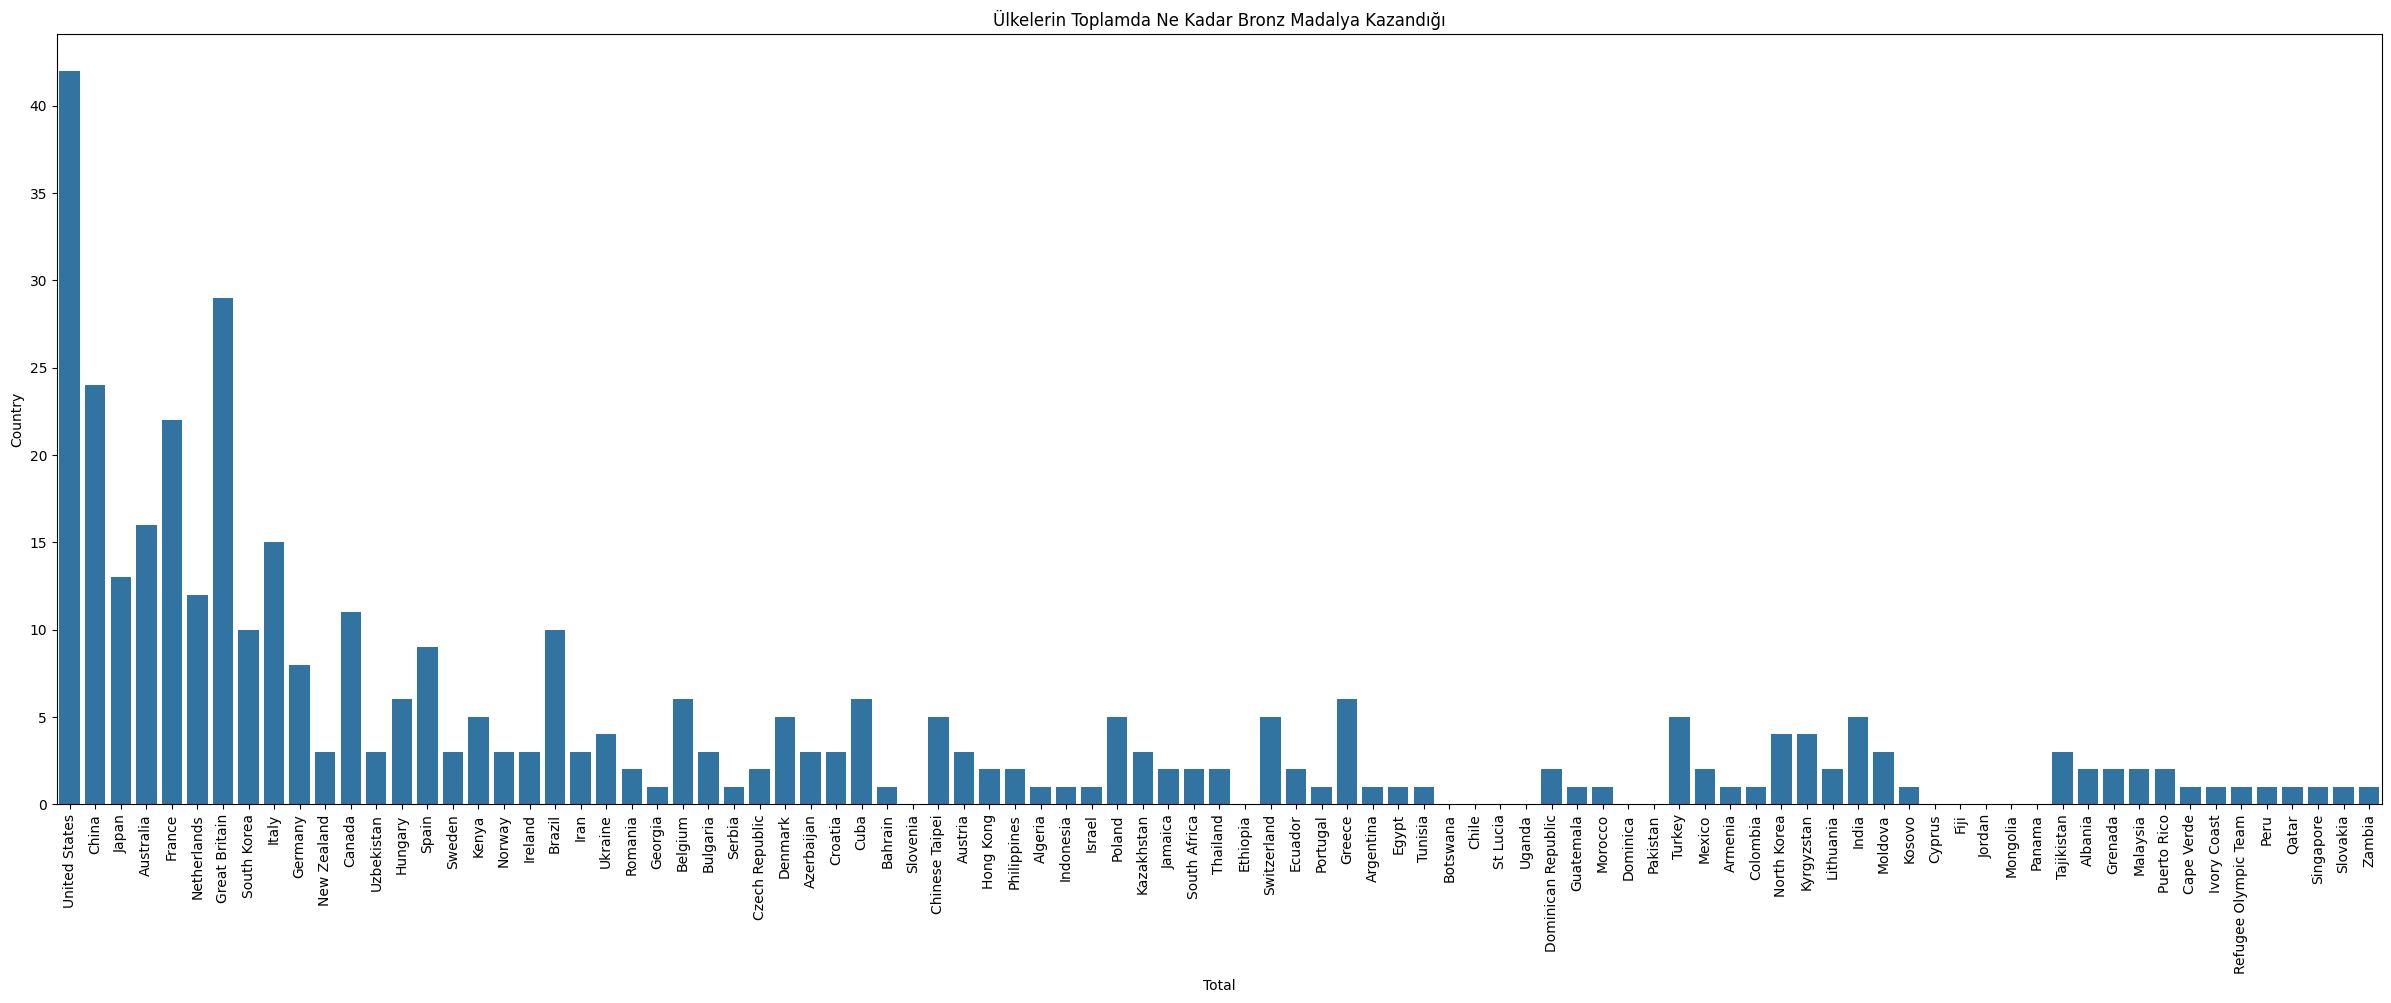

In [ ]:
#Hangi ülke toplamda ne kadar bronz madalya kazandı?

plt.figure(figsize=(30, 10))
sns.barplot(x="Country", y="Bronze", data=df)
plt.xticks(rotation=90)
plt.title("Ülkelerin Toplamda Ne Kadar Bronz Madalya Kazandığı")
plt.xlabel("Total")
plt.ylabel("Country")
plt.show()

2) Dashboard

Python'da veri görselleştirme için interaktif web tabanlı grafikler oluşturmak için kullanılır.

In [83]:
#Bu grafiklerin hepsini tek bir grafikte görmek isteseydik:

app = dash.Dash()

trace1 = go.Bar(x=df["Country"],
                y=df["Gold"],
                name="Altın",
                marker={"color": "#FFD700"})
trace2 = go.Bar(x=df["Country"],
                y=df["Silver"],
                name="Gümüş",
                marker={"color": "#9EA0A1"})
trace3 = go.Bar(x=df["Country"],
                y=df["Bronze"],
                name="Bronz",
                marker={"color": "#CD7F32"})
app.layout = html.Div([dcc.Graph(id="barplot",
                                    figure={
                                        "data": [trace1, trace2, trace3],
                                        "layout": go.Layout(
                                            title="2024 Paris Olimpiyatları Madalya Dağılımı",
                                            barmode="stack"
                                            )}
)])
if __name__ == "__main__":
    app.run_server()

<IPython.core.display.Javascript object>

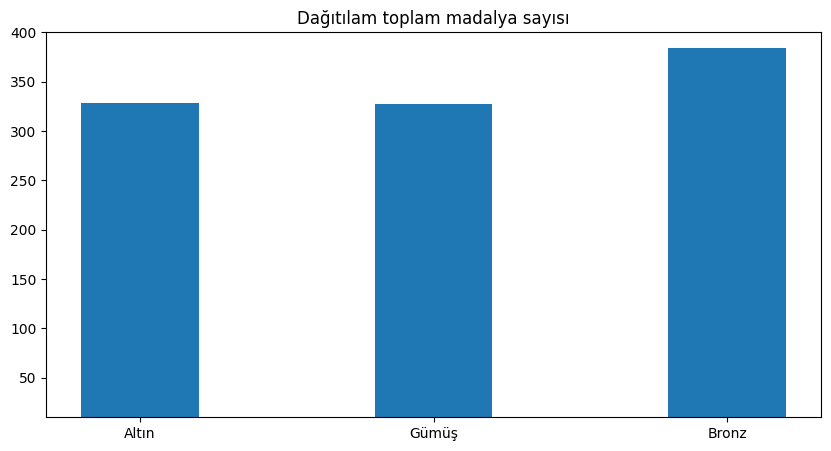

In [ ]:
#Toplam madalya dağılımını bar grafiği ile görelim

list1 = ['Altın', 'Gümüş', 'Bronz']
list2 = [(df.Gold).sum(), (df.Silver).sum(), (df.Bronze).sum()]
fig = plt.figure(figsize = (10, 5))
plt.bar(list1, list2, width = 0.4)
plt.ylim(10, 400)
plt.title("Dağıtılam toplam madalya sayısı")
plt.show()

3) Pasta Grafiği

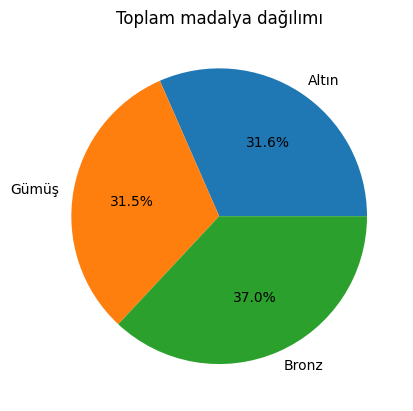

In [ ]:
#Toplam madalya dağılımını pasta grafiği ile görelim

x = [(df.Gold).sum(), (df.Silver).sum(), (df.Bronze).sum()]
label = ['Altın', 'Gümüş', 'Bronz']

fig, ax = plt.subplots()
plt.pie(x, labels=label, autopct='%1.01f%%')

plt.title('Toplam madalya dağılımı')
plt.show()

In [ ]:
df.Gold.sum()

328

In [ ]:
df.Silver.sum()

327

In [ ]:
df.Bronze.sum()

384

In [ ]:
df.Total.sum()

1039

In [ ]:
df.head(10)

,Rank,Country,Country Code,Gold,Silver,Bronze,Total
0,1,United States,US,40,44,42,126
1,2,China,CHN,40,27,24,91
2,3,Japan,JPN,20,12,13,45
3,4,Australia,AUS,18,19,16,53
4,5,France,FRA,16,26,22,64
5,6,Netherlands,NED,15,7,12,34
6,7,Great Britain,GBG,14,22,29,65
7,8,South Korea,KOR,13,9,10,32
8,9,Italy,ITA,12,13,15,40
9,10,Germany,GER,12,13,8,33


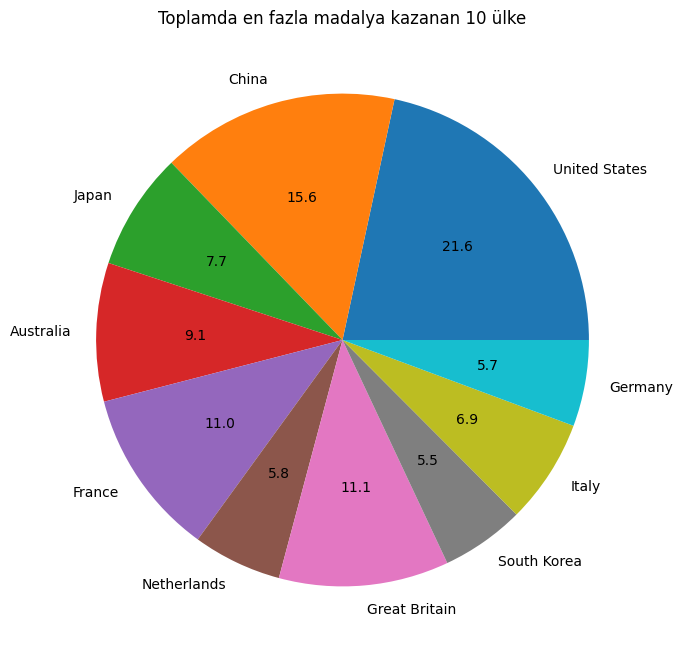

In [ ]:
#Toplamda en çok madalya kazanan 10 ülkenin pasta grafiği

top_10_country = df.head(10)

plt.figure(figsize=(8, 8))
plt.title('Toplamda en fazla madalya kazanan 10 ülke')
plt.pie(top_10_country['Total'], autopct='%.01f', labels=top_10_country['Country'])
plt.show()

In [ ]:
df.tail(10)

,Rank,Country,Country Code,Gold,Silver,Bronze,Total
81,80,Malaysia,MAS,0,0,2,2
82,80,Puerto Rico,PUR,0,0,2,2
83,84,Cape Verde,CPV,0,0,1,1
84,84,Ivory Coast,CIV,0,0,1,1
85,84,Refugee Olympic Team,EOR,0,0,1,1
86,84,Peru,PER,0,0,1,1
87,84,Qatar,QAT,0,0,1,1
88,84,Singapore,SIN,0,0,1,1
89,84,Slovakia,SVK,0,0,1,1
90,84,Zambia,ZAM,0,0,1,1


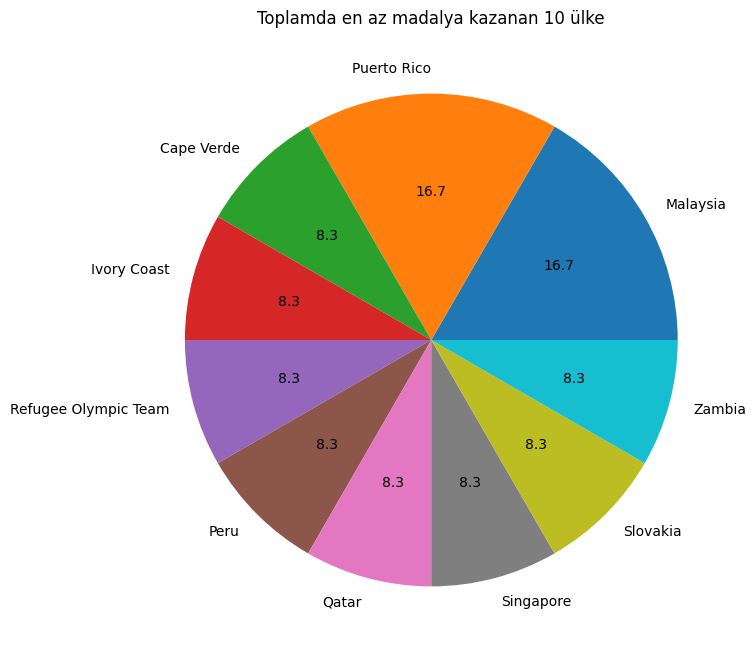

In [ ]:
#Toplamda en az madalya kazanan 10 ülkenin pasta grafiği

bottom_10_country = df.tail(10)

plt.figure(figsize=(8, 8))
plt.title('Toplamda en az madalya kazanan 10 ülke')
plt.pie(bottom_10_country['Total'], autopct='%.01f', labels=bottom_10_country['Country'])
plt.show()

4) Kutu Grafiği

Hem sayısal değşkenin hangi aralıklarda olduğunu hem de veri setinin kendi içinde dağılımını görmek için kullanılır.

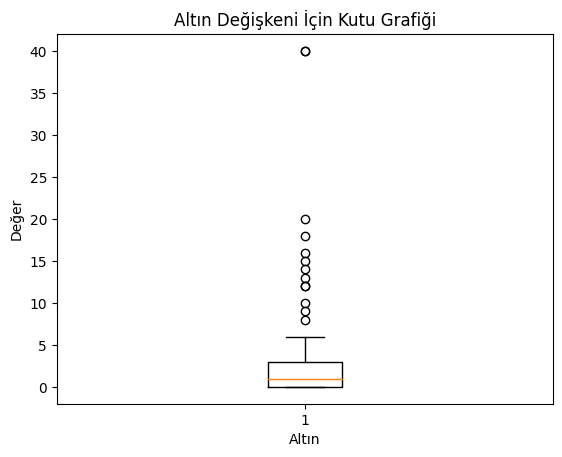

In [ ]:
#Altın için kutu grafiği

plt.boxplot(df.Gold)
plt.xlabel("Altın")
plt.ylabel("Değer")
plt.title("Altın Değişkeni İçin Kutu Grafiği")
plt.show()

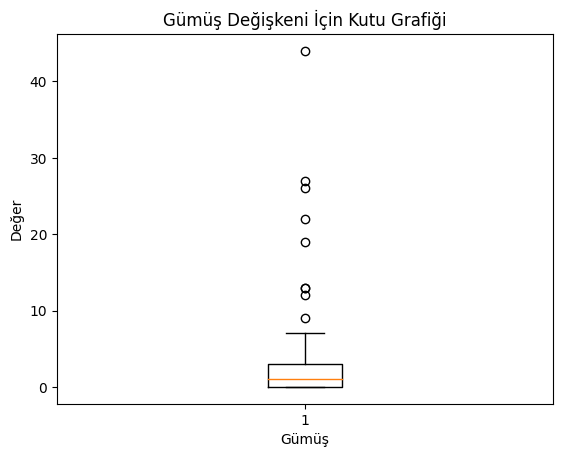

In [ ]:
#Gümüş için kutu grafiği

plt.boxplot(df.Silver)
plt.xlabel("Gümüş")
plt.ylabel("Değer")
plt.title("Gümüş Değişkeni İçin Kutu Grafiği")
plt.show()

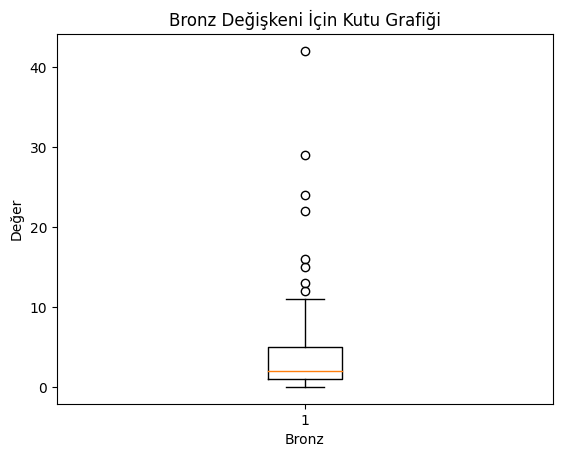

In [ ]:
#Bronz için kutu grafiği

plt.boxplot(df.Bronze)
plt.xlabel("Bronz")
plt.ylabel("Değer")
plt.title("Bronz Değişkeni İçin Kutu Grafiği")
plt.show()

Türkiye üzerine detaylı çalışma.

In [ ]:
# Türkiye'nin verilerini çekelim
turkey_data = df[df['Country'] == 'Turkey']

# Türkiye'nin ortalama altın, gümüş ve bronz madalya sayıları
avg_gold_turkey = turkey_data['Gold'].values[0]
avg_silver_turkey = turkey_data['Silver'].values[0]
avg_bronz_turkey = turkey_data['Bronze'].values[0]

# Tüm ülkelerin altın, gümüş ve bronz madalya sayıları
avg_gold_all = df['Gold'].mean()
avg_silver_all = df['Silver'].mean()
avg_bronz_all = df['Bronze'].mean()

# Türkiye'nin performansını diğer ülkelerle karşılaştıralım
print(f"Türkiye'nin Ortalama Altın Madalya Sayısı: {avg_gold_turkey}")
print(f"Türkiye'nin Ortalama Gümüş Madalya Sayısı: {avg_silver_turkey}")
print(f"Türkiye'nin Ortalama Bronz Madalya Sayısı: {avg_bronz_turkey}")

# Türkiye'nin performansını değerlendirelim
if avg_gold_turkey < avg_gold_all:
    print("Türkiye diğer ülkelerin ortalamasından daha az altın madalya kazanmış.")
else:
    print("Türkiye diğer ülkelerin ortalamasından daha çok altın madalya kazanmış.")

if avg_silver_turkey > avg_silver_all:
    print("Türkiye diğer ülkelerin ortalamasından daha çok gümüş madalya kazanmış.")
else:
    print("Türkiye diğer ülkelerin ortalamasından daha az gümüş madalya kazanmış.")

if avg_silver_turkey < avg_silver_all:
    print("Türkiye diğer ülkelerin ortalamasından daha az bronz madalya kazanmış.")
else:
    print("Türkiye diğer ülkelerin ortalamasından daha çok bronz madalya kazanmış.")

Türkiye'nin Ortalama Altın Madalya Sayısı: 0
Türkiye'nin Ortalama Gümüş Madalya Sayısı: 3
Türkiye'nin Ortalama Bronz Madalya Sayısı: 5
Türkiye diğer ülkelerin ortalamasından daha az altın madalya kazanmış.
Türkiye diğer ülkelerin ortalamasından daha az gümüş madalya kazanmış.
Türkiye diğer ülkelerin ortalamasından daha az bronz madalya kazanmış.


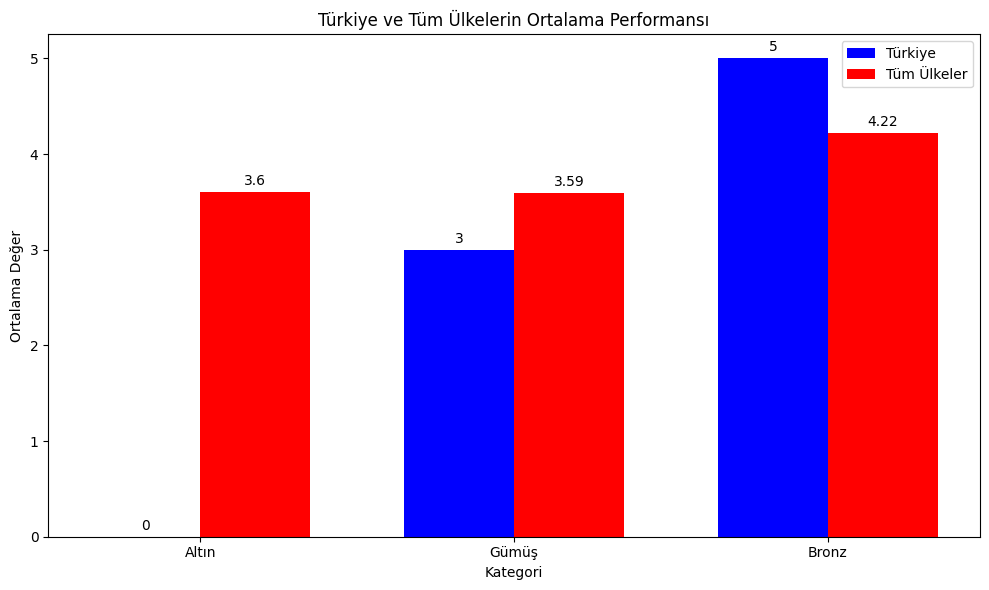

In [ ]:
#Türkiye'nin ve tüm ülkelerin ortalama altın, gümüş ve bronz madalya sayıları
categories = ['Altın', 'Gümüş', 'Bronz']
avg_medals_turkey = [avg_gold_turkey, avg_silver_turkey, avg_bronz_turkey]
avg_medals_all = [avg_gold_all, avg_silver_all, avg_bronz_all]

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(categories))

#Türkiye'nin performansı
bars1 = ax.bar(index, avg_medals_turkey, bar_width, label='Türkiye', color='b')

#Tüm ülkelerin ortalaması
bars2 = ax.bar([i + bar_width for i in index], avg_medals_all, bar_width, label='Tüm Ülkeler', color='r')

ax.set_xlabel('Kategori')
ax.set_ylabel('Ortalama Değer')
ax.set_title('Türkiye ve Tüm Ülkelerin Ortalama Performansı')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(categories)
ax.legend()

#Grafik üzerine değer ekleme
def add_values(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_values(bars1)
add_values(bars2)

plt.tight_layout()
plt.show()